In [49]:
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [50]:
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [51]:
data = pd.read_csv('../../data/chatgpt_generated_wiki_data_1_5000.csv')
wiki_data['Text'] = data['Text']
ai_data['GPT_Generated_Text'] = data['GPT_Generated_Text']

In [52]:
# Word count
data['Text'].replace('', np.nan, inplace=True)
data.dropna(subset=['Text'], inplace=True)
data["word_count_wiki"] = data["Text"].apply(lambda x: len(x))
data = data[(data["word_count_wiki"] >= 100)]

data['GPT_Generated_Text'].replace('', np.nan, inplace=True)
data.dropna(subset=['GPT_Generated_Text'], inplace=True)
data["word_count_gpt"] = data["GPT_Generated_Text"].apply(lambda x: len(x))
data = data[(data["word_count_gpt"] >= 100)]
data.head()

,Page title,Section title,Text,GPT_Generated_Text,word_count_wiki,word_count_gpt
0,Sexhow railway station,History,"The station was opened in April 1857, when the...",Sexhow railway station was originally built as...,1407,1316
2,Etiäinen,Possible causes,One explanation given for the detail of the ap...,"As an AI language model, I cannot give any inf...",635,197
4,Inverse function theorem,Statements,"For functions of a single variable, the theore...",The inverse function theorem states that if a ...,14530,1023
5,Inverse function theorem,Example,Consider the vector-valued function \n \n ...,The Inverse Function Theorem is a result from ...,4436,1280
6,Inverse function theorem,Counter-example,If one drops the assumption that the derivativ...,The inverse function theorem states that if a ...,2085,1635


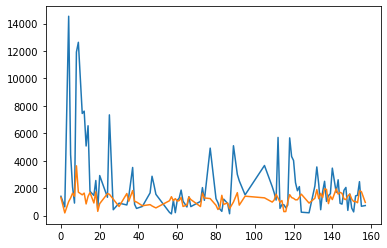

In [53]:
data_100 = data.iloc[0:100,:]
plt.plot(data_100['word_count_wiki'])
plt.plot(data_100['word_count_gpt'])
plt.show()

In [62]:
data_100['char_count_wiki'] = data_100['Text'].apply(len)
data_100['word_density_wiki'] = data_100['char_count_wiki'] / (data_100['word_count_wiki']+1)
data_100['punctuation_count_wiki'] = data_100['Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
data_100['title_word_count_wiki'] = data_100['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_100['upper_case_word_count_wiki'] = data_100['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

data_100['noun_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'noun'))
data_100['verb_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'verb'))
data_100['adj_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'adj'))
data_100['adv_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'adv'))
data_100['pron_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'pron'))


data_100['char_count_gpt'] = data_100['GPT_Generated_Text'].apply(len)
data_100['word_density_gpt'] = data_100['char_count_gpt'] / (data_100['word_count_gpt']+1)
data_100['punctuation_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
data_100['title_word_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_100['upper_case_word_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

data_100['noun_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'noun'))
data_100['verb_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'verb'))
data_100['adj_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'adj'))
data_100['adv_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'adv'))
data_100['pron_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'pron'))

C:\Users\amart\AppData\Local\Temp\ipykernel_10124\2487709530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['char_count_wiki'] = data_100['Text'].apply(len)
C:\Users\amart\AppData\Local\Temp\ipykernel_10124\2487709530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['word_density_wiki'] = data_100['char_count_wiki'] / (data_100['word_count_wiki']+1)
C:\Users\amart\AppData\Local\Temp\ipykernel_10124\2487709530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

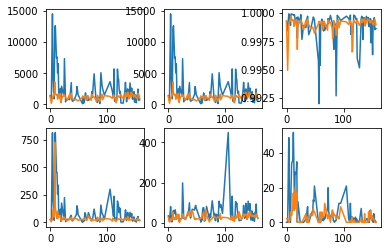

In [69]:
plt.subplot(2, 3, 1)
plt.plot(data_100['word_count_wiki'])
plt.plot(data_100['word_count_gpt'])

plt.subplot(2, 3, 2)
plt.plot(data_100['char_count_wiki'])
plt.plot(data_100['char_count_gpt'])


plt.subplot(2, 3, 3)
plt.plot(data_100['word_density_wiki'])
plt.plot(data_100['word_density_gpt'])

plt.subplot(2, 3, 4)
plt.plot(data_100['punctuation_count_wiki'])
plt.plot(data_100['punctuation_count_gpt'])

plt.subplot(2, 3, 5)
plt.plot(data_100['title_word_count_wiki'])
plt.plot(data_100['title_word_count_gpt'])

plt.subplot(2, 3, 6)
plt.plot(data_100['upper_case_word_count_wiki'])
plt.plot(data_100['upper_case_word_count_gpt'])

plt.show()

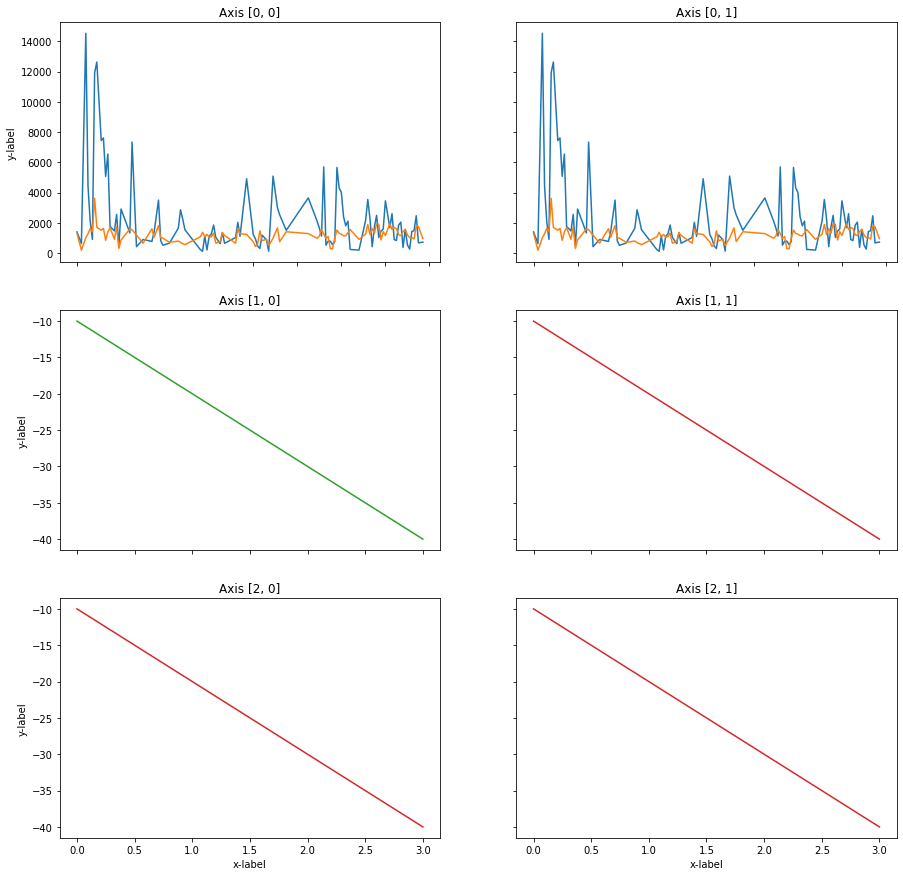

In [80]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(data_100['word_count_wiki'])
axs[0, 0].plot(data_100['word_count_gpt'])
axs[0, 0].set_title('Axis [0, 0]')


axs[0, 1].plot(data_100['char_count_wiki'])
axs[0, 1].plot(data_100['char_count_gpt'])
axs[0, 1].set_title('Axis [0, 1]')

axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')

axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

axs[2, 0].plot(x, -y, 'tab:red')
axs[2, 0].set_title('Axis [2, 0]')

axs[2, 1].plot(x, -y, 'tab:red')
axs[2, 1].set_title('Axis [2, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()